In [ ]:
# code taken from this tutorial: https://github.com/pycaret/pycaret/blob/master/tutorials/Regression%20Tutorial%20Level%20Beginner%20-%20REG101.ipynb

!pip install pycaret
from pycaret.utils import enable_colab 
enable_colab()

In [ ]:
import pandas as pd


In [ ]:
data_raw = pd.read_csv('https://data.sfgov.org/api/views/cne3-h93g/rows.csv')

In [ ]:
data_train = data_raw.drop(columns=['Census Blockgroup', 'FloodHealthIndex_Quintiles'] + [col for col in data_raw if col.endswith('values')])
data_train.head()

,Children,Elderly,NonWhite,Poverty,Education,English,Elevation,SeaLevelRise,Precipitation,Diabetes,MentalHealth,Asthma,Disability,HousingQuality,Homeless,LivAlone,FloodHealthIndex
0,0.072957,8.037850e-10,0.599175,0.356678,0.996080,0.150559,-6.00000,0.182261,0.035771,22.0584,36.5200,15.1339,0.133608,14.10930,17.5025,0.480591,84.8190
1,0.079893,1.240000e-01,0.651000,0.509706,0.724000,0.232000,7.83292,0.000000,0.020516,16.0115,62.0535,10.5741,0.238000,10.24060,15.8921,0.522000,83.4860
2,0.027149,1.030000e-01,0.697000,0.378595,0.862000,0.171000,-1.99906,0.106609,0.005321,1.4068,98.5924,0.8008,0.187000,39.56220,4.9374,0.635000,83.4791
3,0.084215,8.800000e-02,0.584000,0.327362,0.843000,0.119000,-5.96629,0.064579,0.024166,14.9856,54.0699,9.5802,0.229000,7.04366,19.2683,0.427000,82.4925
4,0.095332,2.219991e-01,0.726001,0.794750,0.694997,0.202999,7.13278,0.000000,0.004105,15.5000,63.7499,12.9672,0.424998,13.72550,14.6184,0.731997,81.8061


In [ ]:
data_train.describe()

,Children,Elderly,NonWhite,Poverty,Education,English,Elevation,SeaLevelRise,Precipitation,Diabetes,MentalHealth,Asthma,Disability,HousingQuality,Homeless,LivAlone,FloodHealthIndex
count,578.000000,5.780000e+02,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,5.780000e+02,578.000000,578.000000,578.000000,578.000000
mean,0.131671,1.430411e-01,0.567669,0.271585,0.869517,0.124782,124.147322,0.010224,0.007366,8.317175,19.953382,4.748124,1.034424e-01,6.021817,4.713140,0.347597,49.569516
std,0.057074,6.102362e-02,0.213813,0.154539,0.108676,0.108760,104.939767,0.050148,0.014039,6.101610,15.429652,3.384794,5.513568e-02,8.160820,5.726493,0.148501,13.343632
min,0.007243,8.037850e-10,0.128998,0.057373,0.363000,0.000000,-42.000000,0.000000,0.000000,0.000000,0.051100,0.000000,1.050662e-09,0.000000,0.260200,0.062731,19.293200
25%,0.089490,1.020000e-01,0.403000,0.165123,0.814500,0.046000,35.303625,0.000000,0.000816,4.300800,9.040000,2.710900,7.424997e-02,2.830483,0.520700,0.227000,39.561450
50%,0.133925,1.390000e-01,0.565000,0.234190,0.899000,0.104500,111.691500,0.000000,0.002560,6.428200,14.280000,3.823850,9.378748e-02,4.763075,3.131250,0.325000,47.929400
75%,0.170120,1.730000e-01,0.721750,0.331840,0.954001,0.180500,183.484250,0.000000,0.007140,11.200000,26.817075,5.460375,1.150000e-01,7.256355,4.615400,0.458551,58.226175
max,0.452256,5.540000e-01,0.981456,0.840098,1.000999,0.715007,558.279000,0.503456,0.155139,97.368700,98.592400,16.115600,4.520000e-01,170.940000,19.268300,0.732000,84.819000


In [ ]:
from pycaret.regression import *

In [ ]:
reg_models = setup(data = data_train, target = 'FloodHealthIndex', session_id=123) 

,Description,Value
0,session_id,123
1,Target,FloodHealthIndex
2,Original Data,"(578, 17)"
3,Missing Values,False
4,Numeric Features,16
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(404, 16)"


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[],
                                      target='FloodHealthIndex',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste

In [ ]:
best = compare_models(sort='R2')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,2.1671,8.6731,2.9207,0.9507,0.0574,0.0449,0.116
gbr,Gradient Boosting Regressor,2.2907,9.7636,3.0929,0.9447,0.0612,0.0476,0.133
et,Extra Trees Regressor,2.9299,15.2759,3.8904,0.9128,0.0784,0.0616,0.445
rf,Random Forest Regressor,3.0792,16.9850,4.0946,0.9034,0.0835,0.0656,0.638
ada,AdaBoost Regressor,3.9701,25.6607,5.0497,0.8564,0.1097,0.0886,0.113
lr,Linear Regression,3.9077,31.5557,5.3853,0.8230,0.1008,0.0808,0.317
lar,Least Angle Regression,3.9078,31.5558,5.3853,0.8230,0.1008,0.0808,0.015
br,Bayesian Ridge,3.9124,31.6660,5.3877,0.8229,0.1019,0.0813,0.016
ridge,Ridge Regression,4.4247,34.5248,5.8095,0.8059,0.1169,0.0932,0.012
dt,Decision Tree Regressor,4.8353,41.5393,6.3918,0.7643,0.1348,0.1046,0.018


INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 2
INFO:logs:LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:compare_models() succesfully completed......................................


In [ ]:
lightgbm = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.9293,6.3769,2.5253,0.9612,0.0493,0.0377
1,1.8819,5.1061,2.2597,0.9726,0.0508,0.0431
2,2.0992,8.3108,2.8828,0.9593,0.0537,0.0430
3,2.0953,9.3532,3.0583,0.9599,0.0583,0.0425
4,2.2013,8.1750,2.8592,0.9490,0.0550,0.0443
5,1.8472,7.7070,2.7762,0.9565,0.0616,0.0414
6,2.2524,8.9715,2.9952,0.9494,0.0524,0.0440
7,2.7985,13.7201,3.7041,0.9130,0.0723,0.0584
8,2.4785,11.0336,3.3217,0.9256,0.0679,0.0527


INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 3
INFO:logs:LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:create_model() succesfully completed......................................


In [ ]:
tuned_lightgbm = tune_model(lightgbm)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.5415,5.2625,2.2940,0.9680,0.0409,0.0292
1,1.8796,6.7310,2.5944,0.9639,0.0511,0.0406
2,1.3789,4.0772,2.0192,0.9800,0.0372,0.0278
3,2.2486,11.2730,3.3575,0.9517,0.0650,0.0457
4,2.3649,11.8952,3.4489,0.9258,0.0640,0.0455
5,1.9844,6.2592,2.5018,0.9647,0.0579,0.0461
6,2.0747,9.3981,3.0656,0.9470,0.0514,0.0393
7,2.5917,14.9467,3.8661,0.9052,0.0729,0.0533
8,2.6494,12.5746,3.5461,0.9153,0.0713,0.0557


INFO:logs:create_model_container: 20
INFO:logs:master_model_container: 20
INFO:logs:display_container: 4
INFO:logs:LGBMRegressor(bagging_fraction=0.6, bagging_freq=2, boosting_type='gbdt',
              class_weight=None, colsample_bytree=1.0, feature_fraction=0.4,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=41, min_child_weight=0.001, min_split_gain=0.9,
              n_estimators=260, n_jobs=-1, num_leaves=70, objective=None,
              random_state=123, reg_alpha=2, reg_lambda=3, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:tune_model() succesfully completed......................................


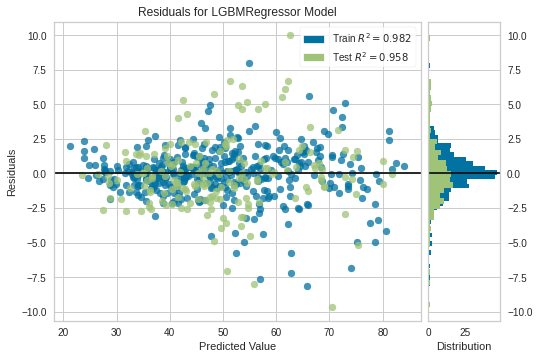

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(tuned_lightgbm)

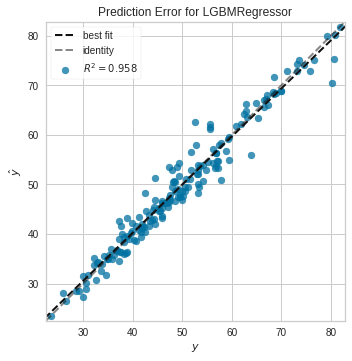

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(tuned_lightgbm, plot = 'error')

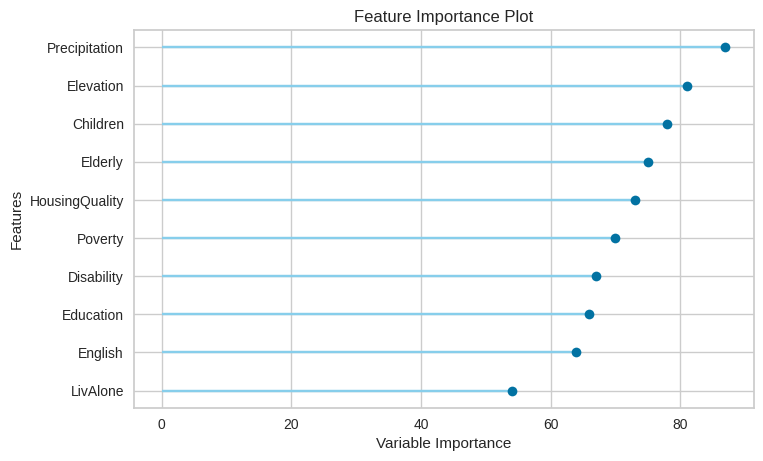

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(tuned_lightgbm, plot='feature')

In [ ]:
evaluate_model(tuned_lightgbm)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=LGBMRegressor(bagging_fraction=0.6, bagging_freq=2, boosting_type='gbdt',
              class_weight=None, colsample_bytree=1.0, feature_fraction=0.4,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=41, min_child_weight=0.001, min_split_gain=0.9,
              n_estimators=260, n_jobs=-1, num_leaves=70, objective=None,
              random_state=123, reg_alpha=2, reg_lambda=3, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
predict_model(tuned_lightgbm)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LGBMRegressor(bagging_fraction=0.6, bagging_freq=2, boosting_type='gbdt',
              class_weight=None, colsample_bytree=1.0, feature_fraction=0.4,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=41, min_child_weight=0.001, min_split_gain=0.9,
              n_estimators=260, n_jobs=-1, num_leaves=70, objective=None,
              random_state=123, reg_alpha=2, reg_lambda=3, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0), probability_threshold=None, encoded_labels=True, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,1.8428,6.7685,2.6016,0.9577,0.0504,0.0382


,Children,Elderly,NonWhite,Poverty,Education,English,Elevation,SeaLevelRise,Precipitation,Diabetes,MentalHealth,Asthma,Disability,HousingQuality,Homeless,LivAlone,FloodHealthIndex,Label
0,0.112635,0.141000,0.898000,0.421786,0.707000,0.232000,337.153015,0.000000,0.000496,8.2000,14.280000,4.4834,0.112000,6.67557,0.5207,0.227000,47.253201,47.281996
1,0.173466,0.099000,0.466000,0.274542,0.937000,0.118000,211.190994,0.000000,0.001129,3.2004,6.690600,1.9240,0.096000,6.42711,4.6154,0.409000,34.193100,35.476024
2,0.206787,0.153000,0.450000,0.165313,0.905000,0.087000,121.002998,0.000000,0.003010,3.5867,8.799300,2.2004,0.093000,2.70782,4.6154,0.271000,37.239601,39.081403
3,0.081136,0.095000,0.366001,0.230223,0.902999,0.018000,172.940994,0.000000,0.020761,6.4000,14.390000,3.6513,0.066000,9.99203,3.7988,0.423000,50.186199,47.648393
4,0.058459,0.206999,0.665001,0.493039,0.937996,0.182999,101.367996,0.000000,0.000000,8.0000,13.810000,3.9498,0.118000,3.37838,0.2606,0.355999,49.926399,46.920569
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,0.094333,0.243000,0.798000,0.559217,0.540000,0.609000,32.078999,0.000000,0.001151,6.4000,20.430000,5.0582,0.187000,19.23510,4.9374,0.408000,69.832901,68.881642
170,0.155141,0.127000,0.673001,0.218900,0.851998,0.112000,8.855770,0.000000,0.033798,4.3000,8.280000,2.8093,0.082000,2.84900,1.8761,0.246000,49.265999,54.405797
171,0.062136,0.086000,0.221000,0.088034,0.981000,0.021000,244.201996,0.000000,0.003040,5.9019,5.474300,3.0778,0.080000,14.63590,2.1589,0.450000,37.519699,36.334468
172,0.121087,0.269999,0.747001,0.631202,0.815998,0.330999,60.182800,0.000000,0.020714,15.4969,63.736198,12.9636,0.232999,3.72671,3.7988,0.518998,76.539398,75.069158


In [ ]:
final_lightgbm = finalize_model(tuned_lightgbm)

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=LGBMRegressor(bagging_fraction=0.6, bagging_freq=2, boosting_type='gbdt',
              class_weight=None, colsample_bytree=1.0, feature_fraction=0.4,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=41, min_child_weight=0.001, min_split_gain=0.9,
              n_estimators=260, n_jobs=-1, num_leaves=70, objective=None,
              random_state=123, reg_alpha=2, reg_lambda=3, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0), fit_kwargs=None, groups=None, model_only=True, display=None, experiment_custom_tags=None, return_train_score=False)
INFO:logs:Finalizing LGBMRegressor(bagging_fraction=0.6, bagging_freq=2, boosting_type='gbdt',
              class_weight=None, colsample_bytree=1.0, feature_fraction=0.4,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=41, min_

In [ ]:
print(final_lightgbm)

LGBMRegressor(bagging_fraction=0.6, bagging_freq=2, boosting_type='gbdt',
              class_weight=None, colsample_bytree=1.0, feature_fraction=0.4,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=41, min_child_weight=0.001, min_split_gain=0.9,
              n_estimators=260, n_jobs=-1, num_leaves=70, objective=None,
              random_state=123, reg_alpha=2, reg_lambda=3, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [ ]:
predict_model(final_lightgbm)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LGBMRegressor(bagging_fraction=0.6, bagging_freq=2, boosting_type='gbdt',
              class_weight=None, colsample_bytree=1.0, feature_fraction=0.4,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=41, min_child_weight=0.001, min_split_gain=0.9,
              n_estimators=260, n_jobs=-1, num_leaves=70, objective=None,
              random_state=123, reg_alpha=2, reg_lambda=3, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0), probability_threshold=None, encoded_labels=True, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,0.8581,1.5047,1.2266,0.9906,0.0244,0.018


,Children,Elderly,NonWhite,Poverty,Education,English,Elevation,SeaLevelRise,Precipitation,Diabetes,MentalHealth,Asthma,Disability,HousingQuality,Homeless,LivAlone,FloodHealthIndex,Label
0,0.112635,0.141000,0.898000,0.421786,0.707000,0.232000,337.153015,0.000000,0.000496,8.2000,14.280000,4.4834,0.112000,6.67557,0.5207,0.227000,47.253201,48.232362
1,0.173466,0.099000,0.466000,0.274542,0.937000,0.118000,211.190994,0.000000,0.001129,3.2004,6.690600,1.9240,0.096000,6.42711,4.6154,0.409000,34.193100,34.729933
2,0.206787,0.153000,0.450000,0.165313,0.905000,0.087000,121.002998,0.000000,0.003010,3.5867,8.799300,2.2004,0.093000,2.70782,4.6154,0.271000,37.239601,37.594794
3,0.081136,0.095000,0.366001,0.230223,0.902999,0.018000,172.940994,0.000000,0.020761,6.4000,14.390000,3.6513,0.066000,9.99203,3.7988,0.423000,50.186199,50.657342
4,0.058459,0.206999,0.665001,0.493039,0.937996,0.182999,101.367996,0.000000,0.000000,8.0000,13.810000,3.9498,0.118000,3.37838,0.2606,0.355999,49.926399,49.323632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,0.094333,0.243000,0.798000,0.559217,0.540000,0.609000,32.078999,0.000000,0.001151,6.4000,20.430000,5.0582,0.187000,19.23510,4.9374,0.408000,69.832901,69.897931
170,0.155141,0.127000,0.673001,0.218900,0.851998,0.112000,8.855770,0.000000,0.033798,4.3000,8.280000,2.8093,0.082000,2.84900,1.8761,0.246000,49.265999,51.193035
171,0.062136,0.086000,0.221000,0.088034,0.981000,0.021000,244.201996,0.000000,0.003040,5.9019,5.474300,3.0778,0.080000,14.63590,2.1589,0.450000,37.519699,36.652663
172,0.121087,0.269999,0.747001,0.631202,0.815998,0.330999,60.182800,0.000000,0.020714,15.4969,63.736198,12.9636,0.232999,3.72671,3.7988,0.518998,76.539398,76.801170


In [ ]:
save_model(final_lightgbm,'lightgbm')

INFO:logs:Initializing save_model()
INFO:logs:save_model(model=LGBMRegressor(bagging_fraction=0.6, bagging_freq=2, boosting_type='gbdt',
              class_weight=None, colsample_bytree=1.0, feature_fraction=0.4,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=41, min_child_weight=0.001, min_split_gain=0.9,
              n_estimators=260, n_jobs=-1, num_leaves=70, objective=None,
              random_state=123, reg_alpha=2, reg_lambda=3, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0), model_name=lightgbm, prep_pipe_=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[],
                                      target='Flood

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[],
                                       target='FloodHealthIndex',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric...
                                boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, feature_fraction=0.4,
                                importance_type='split', learning_rate=0.1,
                                max_depth=-1, min

# Streamlit

In [ ]:
!pip install streamlit

In [ ]:
%%writefile streamlit_app.py 
from pycaret.regression import load_model, predict_model
import streamlit as st
import pandas as pd

model = load_model('lightgbm')


def predict(model, input_df):
	predictions_df = predict_model(estimator=model, data=input_df)
	predictions = predictions_df['Label'][0]
	return predictions


def run():

	st.title("SF Flood Prediction")

	st.sidebar.header('User Input Features')

	Elevation = st.sidebar.slider('Elevation', -50, 600, 0, 10)
	SeaLevelRise = st.sidebar.slider('SeaLevelRise', 0.0, 0.5, 0.0, 0.1)
	Precipitation = st.sidebar.slider('Precipitation', 0.0, 0.2, 0.01, 0.01)
	Children = st.sidebar.slider('Children', 0.0, 0.5, 0.15, 0.05)
	Elderly = st.sidebar.slider('Elderly', 0.0, 0.6, 0.2, 0.1)
	NonWhite = st.sidebar.slider('NonWhite', 0.0, 1.0, 0.55, 0.05)
	Poverty = st.sidebar.slider('Poverty', 0.0, 1.0, 0.25, 0.05)
	Education = st.sidebar.slider('Education', 0.0, 1.0, 0.9, 0.05)
	English = st.sidebar.slider('English', 0.0, 1.0, 0.1, 0.05)
	Diabetes = st.sidebar.slider('Diabetes', 0, 100, 5, 5)
	MentalHealth = st.sidebar.slider('MentalHealth', 0, 100, 15, 5)
	Asthma = st.sidebar.slider('Asthma', 0, 20, 5, 1)
	Disability = st.sidebar.slider('Disability', 0.0, 0.5, 0.1, 0.05)
	HousingQuality = st.sidebar.slider('HousingQuality', 0, 170, 5, 1)
	Homeless = st.sidebar.slider('Homeless', 0, 20, 3, 1)
	LivAlone = st.sidebar.slider('LiveAlone', 0.0, 0.8, 0.3, 0.05)

	input_dict = {'Children': Children,
	   'Elderly': Elderly,
	   'NonWhite': NonWhite,
	   'Poverty': Poverty,
	   'Education': Education,
	   'English': English,
	   'Elevation': Elevation,
	   'SeaLevelRise': SeaLevelRise,
	   'Precipitation': Precipitation,
	   'Diabetes': Diabetes,
	   'MentalHealth': MentalHealth,
	   'Asthma': Asthma,
	   'Disability': Disability,
	   'HousingQuality': HousingQuality,
	   'Homeless': Homeless,
	   'LivAlone': LivAlone}
	input_df = pd.DataFrame([input_dict])

	output = predict(model=model, input_df=input_df)
	st.text('Flood Vulnerability Index = {:.2f}'.format(output))

	st.text('---')




if __name__ == '__main__':
	run()


Writing streamlit_app.py


In [ ]:
!streamlit run /content/streamlit_app.py & npx localtunnel --port 8501

2022-10-09 14:16:22.705 INFO    numexpr.utils: NumExpr defaulting to 2 threads.
[#.................] | fetchMetadata: sill resolveWithNewModule follow-redirect


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://34.70.88.142:8501

npx: installed 22 in 5.852s
your url is: https://fancy-keys-walk-34-70-88-142.loca.lt
2022-10-09 14:16:57.051 Initializing load_model()
2022-10-09 14:16:57.051 load_model(model_name=lightgbm, platform=None, authentication=None, verbose=True)
Transformation Pipeline and Model Successfully Loaded
2022-10-09 14:16:57.297 Initializing predict_model()
2022-10-09 14:16:57.298 predict_model(estimator=Pipeline(steps=[('dtypes',
                 DataTypes_Auto_infer(ml_usecase='regression',
                                      target='FloodHealthIndex')),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categor